<a href="https://colab.research.google.com/github/PS-Ddevil/Civil-bros-projects/blob/master/Project-Sanjeev/Sanjeev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math 
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def calculate_C1(q, q_bar):
    return (1 - 0.5*(q/(q_bar-q)))

def calculate_C2(yr):
    return 1 + 0.2*math.log10(yr/0.1)

def calculate_z1(l, b):
    z = b*(0.5 + 0.0555*((l/b)-1))
    if z/b > 1:
        z = b
    return z

def calculate_z2(l, b):
    z = b*(2 + 0.222*((l/b)-1))
    if z/b > 4:
        z = b
    return z

def calculate_iz_0(l, b):
    iz = (0.1 + 0.0111*((l/b)-1))
    if iz > 0.2:
        iz = 0.2
    return iz

def calculate_iz_max(q, q_bar, q_z1):
    iz_max = 0.5 + 0.1*math.sqrt((q_bar - q)/(q_z1))
    return iz_max

In [0]:
l, b, D, = [float(c) for c in input("Enter the length, breadth and depth of footing in meter as L B D:").split()] 
yr = float(input("Enter the creep time in years:"))
j, x = [float(c) for c in input("Give q_bar Intensity(kN/m2) or Load(kN): 1 Intensity or 2 load:").split()]

#CPT and SPT
ch = int(input('Do you have SPT data or CPT data?\nEnter 1 for SPT or Enter 2 for CPT:'))
if ch == 1:
    z_all = [float(c) for c in input("Enter the breakpoint as(m) x1 x2 x3...:").split()] 
    N = [float(c) for c in input("Enter the N values as N1 N2 N3...:").split()]
    z_all = np.array(z_all)
    z_all = -1*z_all
    z_all = np.sort(z_all)
    z_all[::-1].sort()
    tmp_zall = z_all
    print(z_all)
    N = np.array(N)
    print(N)
    alp = int(input("Enter the value of alpha:"))
    Es = alp*100*N;
    print(Es)
elif ch == 2:
  z_all = [float(c) for c in input("Enter the breakpoints as(m) x1 x2 x3...:").split()]
  qc = [float(c) for c in input("Enter the qc values(kN/m2) qc1 qc2 qc3...:").split()]
  z_all = np.array(z_all)
  z_all = -1*z_all
  z_all = np.sort(z_all)
  z_all[::-1].sort()
  tmp_zall = z_all
  qc = np.array(qc)
  Es = (1+0.4*math.log10(l/b))*2.5*qc
 #CPT and SPT

z1 = calculate_z1(l, b)
if j == 1:
   q_bar = x
elif j == 2:
     q_bar = x/(l*b)
# is_unitwt = int(input("Enter 0 if unit weight is same for each layer or Enter 1 if it is not same for each layer:"))
# if is_unitwt == 0:
is_wt = int(input("Enter 0 if water table below the D+z1 or Enter 1 if it is above D+z1:"))

if is_wt == 0:
    x = float(input("Enter the average unit weight of soil in kN/m3:"))
    q = x*D
    q_z1 = q+x*z1
else:
    x = float(input("Enter the unit weight of soil in kN/m3:"))
    d = float(input("Enter the depth of WT from GL:"))
    if(d>=0 and d<=D):
      q = x*d+(x-9.81)*(D-d)
      q_z1 = q+(x-9.81)*z1
    elif(d>D and d<=z1+D):
      q = x*D
      q_z1 = q+x*(d-D)+(x-9.81)*(z1-(d-D))
    if(d>z1+D):
      q = x*D
      q_z1 = q+x*z1
# else:
  # q = float(input("Enter the q value:"))
  # q_z1 = float(input("Enter the q_z1 value:"))

  # is_wt = int(input("Enter 0 if water table below the D+z1 or Enter 1 if it is above D+z1:"))

  # if is_wt == 0:
  #   x = float(input("Enter the unit weight of soil in kN/m3:"))
  #   q = x*D
  #   q_z1 = q+x*z1
  # else:
  #   # x = float(input("Enter the unit weight of soil in kN/m3"))
  #   d = float(input("Enter the depth of WT from GL:"))
  #   if(d==0):
  #     x = float(input("Enter the submerged unit weight of soil in kN/m3:"))
  #     q = x*D
  #     q_z1 = q+x*z1
  #   elif(d==D):
  #     is_soilsat = int(input("if soil is saturated above d Enter 0 if it is dry Enter 1:"))
  #     if is_soilsat == 0:
  #       x = float(input("Enter the saturated unit weight of soil in kN/m3:"))
  #       q = x*d+(x-9.81)*(D-d)
  #       q_z1 = q+(x-9.81)*z1
  #     else:
  #       x = float(input("Enter the dry unit weight of soil in kN/m3:"))
  #       q = x*d+(x-9.81)*(D-d)
  #       q_z1 = q+(x-9.81)*z1


      
    # elif(d>0 and d<=D):
    #   is_soilsat = int(input("if soil is saturated above d Enter 0 if it is dry Enter 1:"))
    #   if is_soilsat == 0:
    #     x = float(input("Enter the saturated unit weight of soil in kN/m3:"))
    #     q = x*d+(x-9.81)*(D-d)
    #     q_z1 = q+(x-9.81)*z1
    # elif(d>D and d<=z1+D):
    #   q = x*D
    #   q_z1 = q+x*(d-D)+(x-9.81)*(z1-(d-D))
    # if(d>z1+D):
    #   q = x*D
    #   q_z1 = q+x*z1
    




Enter the length, breadth and depth of footing in meter as L B D:4 2 1.2
Enter the creep time in years:10
Give q_bar Intensity(kN/m2) or Load(kN): 1 Intensity or 2 load:1 145
Do you have SPT data or CPT data?
Enter 1 for SPT or Enter 2 for CPT:2
Enter the breakpoints as(m) x1 x2 x3...:.5 2.5 5
Enter the qc values(kN/m2) qc1 qc2 qc3...:2250 3430 2950
Enter 0 if water table below the D+z1 or Enter 1 if it is above D+z1:0
Enter the average unit weight of soil in kN/m3:17.5


In [0]:
C1 = calculate_C1(q, q_bar)
C2 = calculate_C2(yr)
z1 = calculate_z1(l, b)
z2 = calculate_z2(l, b)
print(" C1 = ", C1,"\n"" C2 = ", C2,"\n" " z1 = ", z1,"\n" " z2 = ", z2)
iz_0 = calculate_iz_0(l,b)
iz_max = calculate_iz_max(q, q_bar, q_z1)
print(" iz_0 = ", iz_0,"\n" " iz_max = ", iz_max)

 C1 =  0.9153225806451613 
 C2 =  1.4 
 z1 =  1.111 
 z2 =  4.444
 iz_0 =  0.1111 
 iz_max =  0.6751022979203078


In [0]:
y1 = [0, -z1, -z2]
x1 = [iz_0 , iz_max, 0]

In [0]:
# ch = int(input('Do you have SPT data or CPT data?\n Enter 1 for SPT or Enter 2 for CPT'))
# if ch == 1:
#     z_all = [float(c) for c in input("Enter the breakpoint as(m) x1 x2 x3.....").split()] 
#     N = [float(c) for c in input("Enter the N values as N1 N2 N3\n").split()]
#     # z_all.append(0)
#     # z_all = list(set(z_all))
#     # z_all = z_all
#     z_all = np.array(z_all)
#     z_all = -1*z_all
#     z_all = np.sort(z_all)
#     z_all[::-1].sort()
#     tmp_zall = z_all
#     print(z_all)
#     N = np.array(N)
#     # N = np.flip(N)
#     print(N)
#     alp = int(input("Enter the value of alpha"))
#     Es = alp*100*N;
#     print(Es)
# elif ch == 2:
#   z_all = [float(c) for c in input("Enter the breakpoints as(m) x1 x2 x3......").split()]
#   qc = [float(c) for c in input("Enter the qc values(kN/m2) qc1 qc2 qc3......").split()]
#   z_all = np.array(z_all)
#   z_all = -1*z_all
#   z_all = np.sort(z_all)
#   z_all[::-1].sort()
#   tmp_zall = z_all
#   # print(z_all)
#   qc = np.array(qc)
#   Es = (1+0.4*math.log10(l/b))*2.5*qc
#   # print(Es)

In [0]:
z_new = []
z_new = np.insert(tmp_zall, 1, -z1)
z_new = np.sort(z_new)
z_new[::-1].sort()
z_all = z_new
# print(z_all)
Es_new = []
itr = 0
flag = 0
for i in Es:
  if z_all[itr] == -z1 and flag == 0:
    flag = 1
    Es_new.append(i)
  Es_new.append(i)
  itr+=1
# print(Es_new)

In [0]:
def cal_iz(iz_0, iz_max, z, z1, z2):
  # print(iz_0, iz_max, z, z1, z2)
  z = abs(z)
  if z <= z1:
    return iz_0 + ((iz_max - iz_0)/z1)*z
  elif z > z1 and z <= z2:
    return (iz_max*(z-z2)/(z1-z2))
  else:
    return 0

OUTPUT

 C1 =  0.9153225806451613 
 C2 =  1.4 
 z1 =  1.111 
 z2 =  4.444
 iz_0 =  0.1111 
 iz_max =  0.6751022979203078


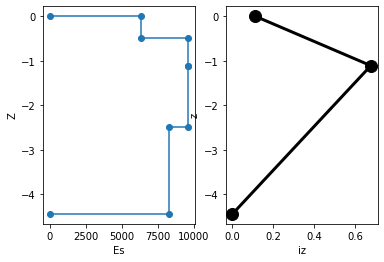

Layer No	Δz(m)	Es(kN/m2)	Iz(at mid)	(Iz/Es)Δz(m3/kN)
0 		 0.5 	6302.32 	0.238 		 1.8882990957005188e-05
1 		0.61 	9607.53 	0.520 		 3.307079727097533e-05
2 		1.39 	9607.53 	0.534 		 7.7264809323943e-05
3 		1.94 	8263.04 	0.197 		 4.631877046606806e-05
							Sum =  0.00017553736801799157

Se = 27.89  mm


In [0]:
print("OUTPUT\n")
print(" C1 = ", C1,"\n"" C2 = ", C2,"\n" " z1 = ", z1,"\n" " z2 = ", z2)
print(" iz_0 = ", iz_0,"\n" " iz_max = ", iz_max)
# importing the required module 
import matplotlib.pyplot as plt 
# print(z2)
# x axis values
x = [] 
z_to_table = []
x.append(0)
x.append(0)
for i in z_all:
  if i < -z2:
    z_to_table.append(-z2)
    x.append(-z2)
    x.append(-z2)
    break
  else:
    z_to_table.append(i)
    x.append(i)
    x.append(i)
# print(x)
# x = [0,7000,7000,11000,11000,16000,16000,0] 

# corresponding y axis values 
y = []
# print(len(z_to_table))
y.append(0)
itr = 1
for i in Es_new:
  if itr > len(z_to_table)+1:
    break;
  y.append(i)
  y.append(i)
  itr+=1
y.append(0)  
plt.subplot(1, 2, 1)
plt.plot(y, x,marker='o') 
  
# naming the x axis 
plt.xlabel('Es') 
# naming the y axis 
plt.ylabel('Z') 
  
# function to show the plot 
# plt.show()
plt.subplot(1, 2, 2)
plt.plot(x1, y1, color='black', linewidth = 3, 
      marker='o', markerfacecolor='black', markersize=12)  
plt.xlabel('iz')  
plt.ylabel('z') 
plt.savefig("ans.jpg")
plt.show()

#For Table
print("Layer No\tΔz(m)\tEs(kN/m2)\tIz(at mid)\t(Iz/Es)Δz(m3/kN)")
itr = -1
# print(z_to_table)
# print(Es_new)
sum = 0;
for i, j in zip(z_to_table, Es_new):
  itr+=1
  # iz = cal_iz(iz_0, iz_max, )
  if itr == 0:
    iz = cal_iz(iz_0, iz_max, -i/2, z1, z2)
    print(itr, "\t\t", -i, "\t%.2f" %round(j,2),"\t%.3f" %round(iz, 3), "\t\t", (iz/j)*(-i))
    sum += (iz/j)*(-i)
    continue
  else:
    iz = cal_iz(iz_0, iz_max, (-i-z_to_table[itr-1])/2, z1, z2)
    print(itr, "\t\t%.2f" %round(z_to_table[itr-1] - i, 2), "\t%.2f" %round(j,2),"\t%.3f" %round(iz, 3), "\t\t", (iz/j)*(z_to_table[itr-1] - i))
    sum += (iz/j)*(z_to_table[itr-1] - i)
print("\t\t\t\t\t\t\t""Sum = ", sum)
# Table End
Se = C1*C2*(q_bar-q)*sum
print("\n""Se = %.2f" %round(Se*1000, 2), " mm")